# Mini project: Projectile motion

## Problem formulation

A small material particle of mass m kg  is thrown from the height of H meters  above the ground level towards a fence of height h m located l meters from the projectile initial location. The magnitude of the initial velocity (speed) is V m/sec.
Find the angle α with the horizontal at which the projectile should be thrown in order to just clear the top of the fence. Plot a trajectory of the projectile. If there are more than one trajectory satisfying the conditions of the problem, plot all of them in one figure. Assume that the effect of air resistance is negligible. Use the gravitational acceleration 
g=9.81 m/(sec^(2).


## Part 1

Solve the problem interactively, step by step with specific parameters H = 2; h = 3.5; l = 20; V = 15.

### Step 1: Solving the equations of projectile motion

Use Newton's Second Law $m*a = F$ to set up the ODEs for the horizontal and vertical components of position $x(t), y(t)$ of the projectile. Find the genearal solutions to the ODEs. Then determine the four arbitrary constants in this general solution using the initial conditions for position and velocity.

The solution involves unknown direction $\alpha$ of the initial velocity.

In [66]:
reset

<built-in function reset>

In [11]:
### Your solution for Step 1 goes here
x0=0; y0=2; l=20; h=3.5; V=15;H=2;g=9.81
var('alpha')
# Governing equations: m*x'=0, m*y'=-m*g.
# Initial conditions:x0=0,y0=H,vx=V*cos(alpha),vy=V*sin(alpha)
# Solution:
x(t)=V*cos(alpha)*t
y(t)=-g*(t^2/2)+V*sin(alpha)*t+H

### Step 2: Finding the time when projectile reaches the fence

Use x(t) to find the time tfence when the projectile reaches the fence location, that is, when 

$x(t) =fence \ location$. 

In [14]:
# You code goes here
# Write the equation x(tfence)=(fence location) using solution x(t) found on Step 1
#Solve the equaiton for tfence
tfence= 1/(V*cos(alpha));tfence
# tfence involves the unknown parameter $\alpha$.

1/15/cos(alpha)

### Step 3: Setting up the equation for $\alpha$ and finding $\alpha$

The height $y(tfence)$ must be equal to the height of the fence: $y(tfence)=h$

In [15]:
# Write the equation y(tfence)=h using th solution for y(t) found on Step 1. 

eq=y(tfence)==h;eq

sin(alpha)/cos(alpha) - 0.0218000000000000/cos(alpha)^2 + 2 == 3.50000000000000

In [16]:
#Use the identity 1/cos(s)^2=1+tan(s)^2 to rewrite the equation as quadratic with respect to $z=tan(alpha)$ and solve for $z$. Use the dictionary type for your solution.
var('z')
eq_z=20*z-8.72*(1+z^2)-1.5==0
tan_alpha=solve(eq_z,z,solution_dict=True);tan_alpha

[{z: -1/218*sqrt(6801) + 125/109}, {z: 1/218*sqrt(6801) + 125/109}]

In [17]:
# Now use the inverse of the function and find alpha1 and alpha2 from equation tan(alpha)=z
alpha1=(arctan(tan_alpha[0][z])).n()
alpha2=(arctan(tan_alpha[1][z])).n()

In [31]:
alpha1,alpha2

(0.655232965684082, 0.990423208821582)

### Step 4: Plotting the trajectories of the projectile

In [20]:
#Define parametric equations of the two trajectories
#First trajectory:
y1(t)=y(t).subs(alpha=alpha1);x1(t)=x(t).subs(alpha=alpha1)
#Second trajectory
y2(t)=y(t).subs(alpha=alpha2);x2(t)=x(t).subs(alpha=alpha2)
#For each trajectory find the time when projectile hits the ground. Experiment with time range to bracket the solution or just play with plots to find the needed range
tfinal1=find_root(y1(t),0,4)
tfinal2=find_root(y2(t),0,4)

In [73]:
tfinal1,tfinal2

(2.061252505239422, 2.7079389982298383)

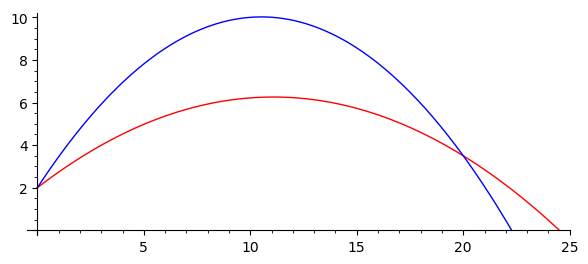

In [21]:
plot1=parametric_plot((x1(t),y1(t)),(t,0,tfinal1),color='red')
plot2=parametric_plot((x2(t),y2(t)),(t,0,tfinal2),color='blue')
(plot1+plot2).show()